# XGBoost for Regression

# MR:- XGB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
data= pd.read_csv("elon.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.shape #number of rows and columns

(200, 4)

In [4]:
data.info()#prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [6]:
data.isnull().sum()#returns the number of missing values in the data set

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.describe()# calculating some statistical data

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


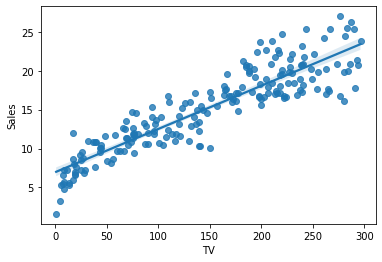

In [8]:
sns.regplot(x='TV',y='Sales',data=data)
plt.show()

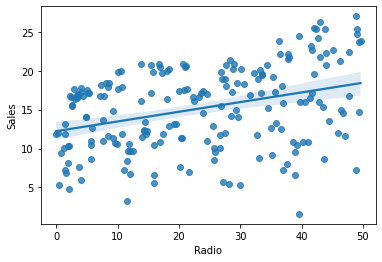

In [9]:
sns.regplot(x='Radio',y='Sales',data=data)
plt.show()

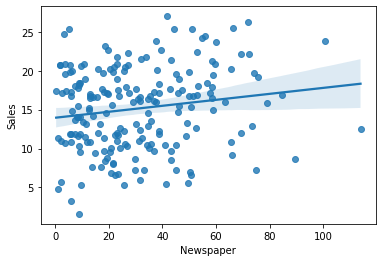

In [10]:
sns.regplot(x='Newspaper',y='Sales',data=data)
plt.show()

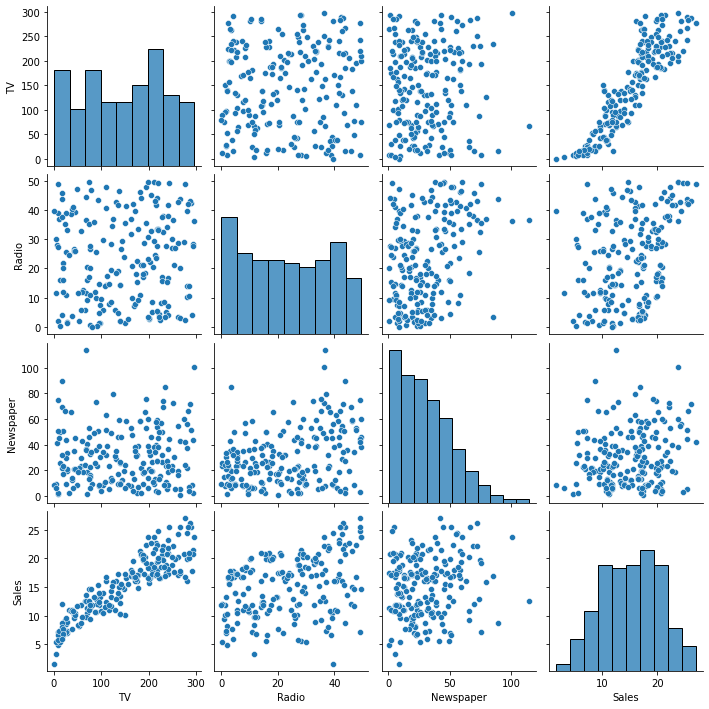

In [11]:
sns.pairplot(data)#Pair plot is used to understand the best set of features to explain a relationship between two variables
plt.show()

In [12]:
data.corr()#pairwise correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


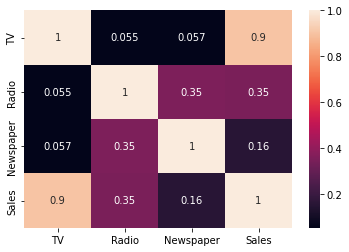

In [13]:
sns.heatmap(data.corr() ,annot=True)
plt.show()

In [14]:
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values

In [15]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [16]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

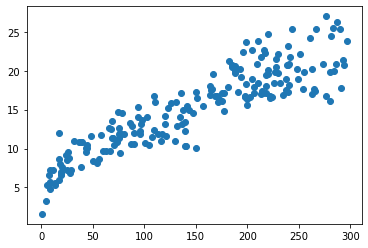

In [17]:
plt.scatter(x,y)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)

In [19]:
x_train #check tv

array([[116. ],
       [177. ],
       [ 43.1],
       [ 62.3],
       [224. ],
       [ 38.2],
       [ 70.6],
       [147.3],
       [104.6],
       [ 76.3],
       [ 78.2],
       [168.4],
       [  8.7],
       [  7.8],
       [ 76.4],
       [129.4],
       [ 73.4],
       [289.7],
       [ 19.6],
       [197.6],
       [284.3],
       [184.9],
       [112.9],
       [ 23.8],
       [290.7],
       [ 19.4],
       [293.6],
       [ 18.7],
       [134.3],
       [ 25.6],
       [100.4],
       [ 80.2],
       [188.4],
       [177. ],
       [125.7],
       [209.6],
       [142.9],
       [184.9],
       [222.4],
       [241.7],
       [ 17.2],
       [120.5],
       [ 89.7],
       [191.1],
       [ 75.5],
       [193.2],
       [ 85.7],
       [266.9],
       [ 39.5],
       [261.3],
       [ 13.2],
       [193.7],
       [296.4],
       [265.6],
       [214.7],
       [149.7],
       [131.7],
       [ 57.5],
       [240.1],
       [141.3],
       [180.8],
       [ 97.2],
       [

In [20]:
y_train #check sale

array([11. , 14.8, 10.1,  9.7, 16.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
       16.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 16.7, 20. , 20.5,
       11.9,  9.2, 17.8,  6.6, 20.7,  6.7, 14. ,  9.5, 10.7, 11.9, 19.9,
       17.1, 15.9, 20.9, 15. , 20.7, 16.7, 21.8, 12. , 14.2, 10.6, 17.3,
       11.9, 20.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
       17.3, 12.9, 11.8, 20.9, 15.5, 17.9, 13.2, 20.1, 10.3, 19.8, 12.3,
       12.6, 20.7, 17.1, 18.2,  8. , 22.1, 25.5, 16. , 18.3, 15.2, 16. ,
        8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 17. , 20.5, 17.6, 25.4,
       17.3, 21.5, 17.1, 23.2, 11.5, 20.6, 17.9,  9.6, 16.5, 15. , 21.2,
       19.6, 15.5, 16.8, 22.6,  9.7, 11.8, 11.9, 13.2, 18.4,  7.3, 13.6,
       20.2, 17.2, 16.7,  4.8, 13.7, 18.4, 17.5, 17.7, 24.4,  8.8, 27. ,
       10.8, 17.2, 26.2, 14. , 20.2, 12. , 16.4, 14. , 23.8, 19.8, 12.9,
       17.5, 13.2, 16.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
        1.6, 11.6, 19.7, 17.2, 12.2, 16. , 17. ,  7

In [21]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
xgb_model.predict(x_test)

array([17.880438 , 19.160408 , 20.711021 ,  5.403233 , 19.767073 ,
       11.973633 , 22.146915 , 10.172751 , 16.855148 , 16.913172 ,
        7.488938 , 11.585327 , 18.448017 ,  3.2186863, 12.286012 ,
       16.19028  ,  6.4905276, 17.020899 , 11.973633 , 17.717775 ,
       21.8418   , 13.286675 ,  7.768167 , 18.918385 , 13.286675 ,
       11.585327 , 17.239777 , 12.286012 , 12.900588 ,  4.96285  ,
       16.671322 , 13.286675 , 18.017462 ,  8.869742 , 19.99905  ,
       17.717775 , 10.172751 , 17.09226  , 11.441164 ,  8.816981 ],
      dtype=float32)

In [23]:
xgb_model.score(x_train,y_train)*100

98.9708506424613

In [24]:
xgb_model.score(x_test,y_test)*100

81.48673396771835

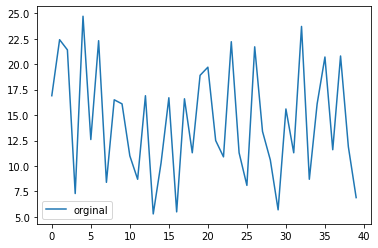

In [27]:
plt.plot(y_test,label='orginal')
plt.plot(label='Predicted')
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(x_train,y_train)